In [343]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [344]:
import pandas as pd   
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [345]:
import os
os.chdir('./')

In [346]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [347]:
train.head()

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,job_type,family_size,credit
0,0,1,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,1,0,NaN,2,1
1,1,1,0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,1,Laborers,3,1
2,2,0,1,1,450000.0,Working,Higher education,Married,House / apartment,1,0,Managers,2,2
3,3,1,0,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,Sales staff,2,0
4,4,1,1,1,157500.0,State servant,Higher education,Married,House / apartment,1,0,Managers,2,2


In [348]:
test.head()

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,job_type,family_size
0,22001,1,0,1,112500.0,Working,Incomplete higher,Civil marriage,House / apartment,1,0,NaN,2
1,22002,1,0,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,NaN,2
2,22003,0,1,1,225000.0,Pensioner,Higher education,Separated,House / apartment,1,0,NaN,1
3,22004,0,1,1,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,Rented apartment,1,1,Drivers,2
4,22005,1,0,0,202500.0,Working,Higher education,Married,Municipal apartment,1,0,NaN,3


In [349]:
train.shape

(22001, 14)

In [350]:
test.shape

(4456, 13)

In [351]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22001 entries, 0 to 22000
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           22001 non-null  int64  
 1   gender          22001 non-null  int64  
 2   is_car          22001 non-null  int64  
 3   is_reality      22001 non-null  int64  
 4   income_year     22001 non-null  float64
 5   income_type     22001 non-null  object 
 6   edu_type        22001 non-null  object 
 7   marital status  22001 non-null  object 
 8   house_type      22001 non-null  object 
 9   is_mobile       22001 non-null  int64  
 10  is_email        22001 non-null  int64  
 11  job_type        15223 non-null  object 
 12  family_size     22001 non-null  int64  
 13  credit          22001 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 2.4+ MB


#  **1. 데이터 전처리**

### 0) target의 불균형

<Axes: >

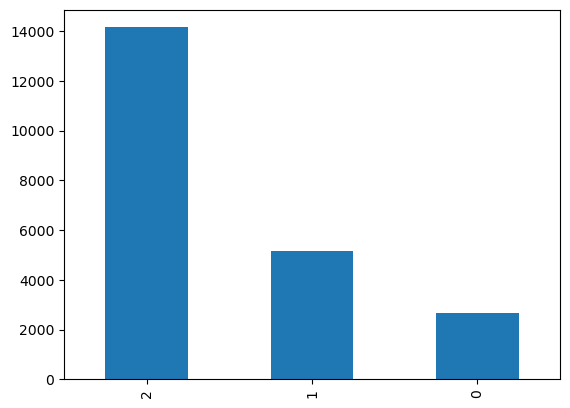

In [352]:
train['credit'].value_counts().plot.bar()

In [354]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE 객체 생성
smote = SMOTE(sampling_strategy='auto', random_state=42)

# 'credit' 열을 제외한 특성 데이터
X_train = train.drop(columns=['credit'])

# 'credit' 열을 클래스 레이블로 설정
y_train = train['credit']

# SMOTE를 사용하여 오버샘플링 수행
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 오버샘플링 후의 클래스 분포 확인
print("클래스 분포:", Counter(y_resampled))


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\smlle\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

### 1) 결측치 제거

In [ ]:
train.isnull().sum()

index                0
gender               0
is_car               0
is_reality           0
income_year          0
income_type          0
edu_type             0
marital status       0
house_type           0
is_mobile            0
is_email             0
job_type          6778
family_size          0
credit               0
dtype: int64

In [ ]:
train=train.drop('job_type', axis=1)       # 유일하게 결측치가 존재하는 job_type drop
test=test.drop('job_type', axis=1)          # train과 test 데이터셋에서 결측치 제거

In [ ]:
train .apply (lambda x : len(x.unique( ) ) )     # train과 test의 요소들의 개수를 파악

index             22001
gender                2
is_car                2
is_reality            2
income_year         247
income_type           5
edu_type              5
marital status        5
house_type            6
is_mobile             1
is_email              2
family_size           9
credit                3
dtype: int64

In [ ]:
test .apply (lambda x : len(x.unique( ) ) )            

index             4456
gender               2
is_car               2
is_reality           2
income_year        159
income_type          5
edu_type             5
marital status       5
house_type           6
is_mobile            1
is_email             2
family_size          9
dtype: int64

### 2)  연속형 변수에 대한 전처리 진행

(2.6220000000000003, 10.43]     3208
(10.43, 18.16]                 10289
(18.16, 25.89]                  4622
(25.89, 33.62]                  2279
(33.62, 41.35]                   974
(41.35, 49.08]                   313
(49.08, 56.81]                   128
(56.81, 64.54]                    49
(64.54, 72.27]                    85
(72.27, 80.0]                     54
Name: income_year, dtype: int64


<Axes: ylabel='Frequency'>

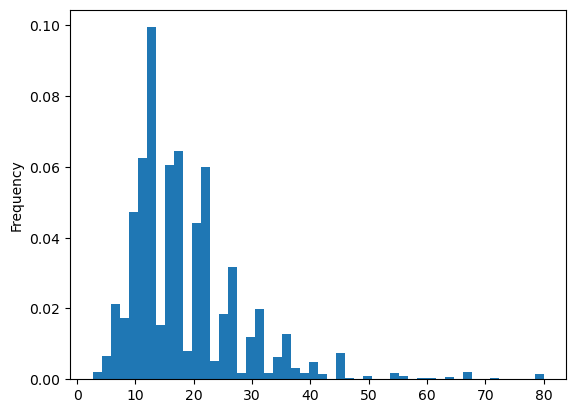

In [ ]:
train['income_year'] = train['income_year'].astype(object)    
train['income_year'] = train['income_year']/10000 
test['income_year'] = test['income_year']/10000

# 70이상의 값이 매우 적게 존재하는 것을 확인, 이상치 처리
train . loc [train['income_year'] > 80]                             # 80가 넘는 값을 가진 모든 row를 호출
train . loc [train['income_year'] > 80 , 'income_year' ]           # 해당 row에서 80 이상인 요소 컬럼만을 호출   
train . loc [train['income_year'] > 80 , 'income_year' ]   = 80      # 80 값으로 바꾸었어
test . loc [test['income_year'] > 80]
test . loc [test['income_year'] > 80 , 'income_year' ]
test . loc [test['income_year'] > 80 , 'income_year' ]   = 80

print(train['income_year'].value_counts(bins=10,sort=False))
train['income_year'].plot(kind='hist',bins=50,density=True)

In [ ]:
print(train [ 'income_year' ] .min( ))        
print(train ['income_year'] .max())
print(len (train ['income_year'] .unique ( )))           # 최소 2.7부터 70까지, 236개의 요소로 이루어짐을 알수있다

2.7
80
241


In [ ]:
counts, bin_dividers  =  np.histogram (train['income_year'] , bins=7 )         # 구간 나눠준 값을 counts, bin_dividers 에 저장

train['income_year'] = pd.factorize(pd.cut(train ['income_year'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]  
test['income_year'] = pd.factorize(pd.cut(test['income_year'],bins = bin_dividers, include_lowest=True, labels = [0, 1, 2, 3, 4, 5, 6]) )  [ 0 ]  

In [ ]:
test               # test도 income_year가 인수형 변수로 구분됨을 확인가능

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,family_size
0,22001,1,0,1,0,Working,Incomplete higher,Civil marriage,House / apartment,1,0,2
1,22002,1,0,0,0,Working,Secondary / secondary special,Married,House / apartment,1,0,2
2,22003,0,1,1,1,Pensioner,Higher education,Separated,House / apartment,1,0,1
3,22004,0,1,1,1,Commercial associate,Secondary / secondary special,Civil marriage,Rented apartment,1,1,2
4,22005,1,0,0,1,Working,Higher education,Married,Municipal apartment,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4451,26452,1,0,0,1,State servant,Secondary / secondary special,Married,House / apartment,1,0,4
4452,26453,1,0,1,1,Working,Higher education,Separated,House / apartment,1,0,2
4453,26454,1,1,0,4,Working,Secondary / secondary special,Civil marriage,With parents,1,0,2
4454,26455,0,0,1,1,Working,Incomplete higher,Single / not married,House / apartment,1,0,1


### 3)  범주형 데이터에 대한 인코딩 진행

In [ ]:
#income_type, edu_type, marital status, house_type 범주형 데이터에 대한 인코딩 진행

print(train['edu_type'].unique())
print(train['marital status'].unique())
print(train['house_type'].unique())

['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])

train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])

train['marital status']=label_encoder.fit_transform(train['marital status'])
test['marital status']=label_encoder.transform(test['marital status'])

train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])

train['income_year']=label_encoder.fit_transform(train['income_year'])
test['income_year']=label_encoder.fit_transform(test['income_year'])

In [ ]:
train

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,family_size,credit
0,0,1,0,0,0,0,1,1,2,1,0,2,1
1,1,1,0,1,0,0,4,0,1,1,1,3,1
2,2,0,1,1,1,4,1,1,1,1,0,2,2
3,3,1,0,1,0,0,4,1,1,1,0,2,0
4,4,1,1,1,0,2,1,1,1,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,21996,0,0,1,2,4,4,2,1,1,0,1,1
21997,21997,0,1,1,2,4,4,1,5,1,0,3,2
21998,21998,1,0,1,3,4,3,1,1,1,0,2,1
21999,21999,1,0,1,0,0,4,1,1,1,0,2,2


In [ ]:
test

,index,gender,is_car,is_reality,income_year,income_type,edu_type,marital status,house_type,is_mobile,is_email,family_size
0,22001,1,0,1,0,4,2,0,1,1,0,2
1,22002,1,0,0,0,4,4,1,1,1,0,2
2,22003,0,1,1,1,1,1,2,1,1,0,1
3,22004,0,1,1,1,0,4,0,4,1,1,2
4,22005,1,0,0,1,4,1,1,2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4451,26452,1,0,0,1,2,4,1,1,1,0,4
4452,26453,1,0,1,1,4,1,2,1,1,0,2
4453,26454,1,1,0,4,4,4,0,5,1,0,2
4454,26455,0,0,1,1,4,2,3,1,1,0,1


In [ ]:
train.shape

(22001, 13)

In [ ]:
test.shape

(4456, 12)

### 4) 특성 추가

In [ ]:
# 가족의존성 

# 3. 데이터 모델링

In [ ]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

Train set: 
(16500, 12)
(16500, 1)
Validation set: 
(5501, 12)
(5501, 1)


In [ ]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

def run_kfold(clf, train_x, train_y, test_x):
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes = []
    sub = np.zeros((test_x.shape[0], 3))

    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_val)
        
        # 정확도 계산
        accuracy = accuracy_score(y_val, predictions)
        outcomes.append(accuracy)

        sub += clf.predict_proba(test_x)

    mean_outcome = np.mean(outcomes)
    
    return sub / folds.n_splits, mean_outcome

my_submission, mean_accuracy = run_kfold(RandomForestClassifier(), train_x, train_y, test_x)
print("평균 정확도:", mean_accuracy)


평균 정확도: 0.5459750676499142


In [ ]:
answer_list = []
for i in my_submission:
    answer = i.argmax()
    answer_list.append(answer)

In [ ]:
print(answer_list.count(0))
print(answer_list.count(1))
print(answer_list.count(2))

140
321
3995


In [ ]:
submission['credit']=answer_list

In [ ]:
# submission.to_csv('1차submission.csv', index=False)